In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CSV_data/anime/anime.csv', encoding='utf-8')
rating = pd.read_csv('CSV_data/anime/rating.csv')

In [3]:
rating[(rating['anime_id']==30913) | (rating['anime_id']==30924) | (rating['anime_id']==20261)]

,user_id,anime_id,rating
1392686,13270,30913,-1
1969308,19104,30913,-1
1969309,19104,30924,-1
3659298,34240,30913,9
3660124,34248,30913,-1
3959155,37442,30913,9
5104517,48766,20261,-1
5483385,51693,30913,-1
6765685,62549,30913,-1
6765686,62549,30924,-1


In [4]:
rating = rating.drop(rating[(rating['anime_id']==30913) | (rating['anime_id']==30924) | (rating['anime_id']==20261)].index)

In [37]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813727 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


In [5]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
print(df['members'].isna().sum())

0


In [7]:
print(df['genre'].isna().sum())

62


In [8]:
print(df['type'].isna().sum())

25


In [9]:
print(df['rating'].isna().sum())

230


In [6]:
df[df['episodes']=='Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [6]:
df[df['anime_id']==30743]

,anime_id,name,genre,type,episodes,rating,members
9128,30743,Kanagatari. Kanabakari.: Kanadian Families,Slice of Life,OVA,1,6.36,209


In [10]:
duplicatedTitles = df[df.duplicated('name')]['name'].tolist()

In [11]:
df[(df['name'] == duplicatedTitles[0]) | (df['name'] == duplicatedTitles[1])]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [140]:
print(len(df['name'].unique()))

12292


In [11]:
genreList = df['genre'].tolist()

In [75]:
genreUniques = []

for line in genreList:
    words = line.split(',')
    for word in words:
        wordNoSpaces = word.strip()
        if not wordNoSpaces in genreUniques:
            genreUniques.append(wordNoSpaces)

AttributeError: 'float' object has no attribute 'split'

In [67]:
print(*genreUniques, sep='\n')

Drama
Romance
School
Supernatural
Action
Adventure
Fantasy
Magic
Military
Shounen
Comedy
Historical
Parody
Samurai
Sci-Fi
Thriller
Sports
Super Power
Space
Slice of Life
Mecha
Music
Mystery
Seinen
Martial Arts
Vampire
Shoujo
Horror
Police
Psychological
Demons
Ecchi
Josei
Shounen Ai
Game
Dementia
Harem
Cars
Kids
Shoujo Ai


In [87]:
print(df[df['rating'] > 9])

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
5         32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6         11061                             Hunter x Hunter (2011)   
7           820                               Ginga Eiyuu Densetsu   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9         15417                           Gintama&#039;: Enchousen   
10         4181                               Clannad: After Story   
11        28851                                     Koe no Katachi   
12          918                                            Gintama   
9078      33607     

In [11]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [21]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [77]:
print(rating['rating'].isna().sum())

0


In [39]:
print((rating['user_id'].unique()))

[    1     2     3 ... 73514 73515 73516]


In [41]:
print(len(rating['user_id'].unique()))

73515


In [103]:
print(rating[(rating['rating'] > -1)&(rating['rating'] < 0)])

Empty DataFrame
Columns: [user_id, anime_id, rating]
Index: []


In [107]:
print(len(rating[rating['rating']==-1]))

1476496


In [104]:
animeList = rating['anime_id'].unique()
print(len(animeList))

11200


In [106]:
for value in animeList:
    if value in df['anime_id'].values:
        continue
    else:
        print(value)

30913
30924
20261


In [23]:
noExisting = rating[(rating['anime_id'] == 30913) | (rating['anime_id'] == 30924) | (rating['anime_id'] == 20261)]

In [25]:
noExisting

,user_id,anime_id,rating
1392686,13270,30913,-1
1969308,19104,30913,-1
1969309,19104,30924,-1
3659298,34240,30913,9
3660124,34248,30913,-1
3959155,37442,30913,9
5104517,48766,20261,-1
5483385,51693,30913,-1
6765685,62549,30913,-1
6765686,62549,30924,-1


In [ ]:
#General statistics

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [45]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813727 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


In [63]:
rating[rating['user_id']==2]

,user_id,anime_id,rating
153,2,11771,10
154,2,12189,-1
155,2,16417,-1


In [105]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
mostViewedAnime = rating

In [6]:
mostViewedAnime = mostViewedAnime.drop('user_id', axis=1)

In [7]:
mostViewedAnime.groupby('anime_id').count().sort_values(by='rating', ascending=False)

,rating
anime_id,
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
...,...
27459,1
27457,1
27455,1


In [13]:
graph1 = mostViewedAnime.groupby('anime_id').count().sort_values(by='rating', ascending=False)

In [11]:
graph1.head()

,rating,nonnegative
anime_id,,
1535,39340,34226.0
11757,30583,26310.0
16498,29584,25290.0
1575,27718,24126.0
226,27506,23528.0


In [33]:
df[df['anime_id']==1535]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [35]:
print(df[df['anime_id']==1535]['genre'])

40    Mystery, Police, Psychological, Supernatural, ...
Name: genre, dtype: object


In [8]:
mostVotedAnime = rating[rating['rating']>-1]

In [172]:
print(len(mostVotedAnime['user_id'].unique()))

69600


In [9]:
mostVotedAnime = mostVotedAnime.drop('user_id', axis=1)

In [14]:
mostVotedAnime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6337241 entries, 47 to 7813736
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   anime_id  int64
 1   rating    int64
dtypes: int64(2)
memory usage: 145.0 MB


In [10]:
statsPerAnime = pd.DataFrame()

In [11]:
statsPerAnime['counts'] = mostVotedAnime.groupby('anime_id').count().sort_values(by='rating', ascending=False)

In [14]:
graph1['nonnegative'] = mostVotedAnime.groupby('anime_id').count().sort_values(by='rating', ascending=False)

In [15]:
graph1 = graph1.sort_values(by='rating', ascending=False)

In [16]:
graph1limited = graph1[:40]

In [21]:
graph1limited.head()

,rating,nonnegative
anime_id,,
1535,39340,34226.0
11757,30583,26310.0
16498,29584,25290.0
1575,27718,24126.0
226,27506,23528.0


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_1944\2770415263.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=90)


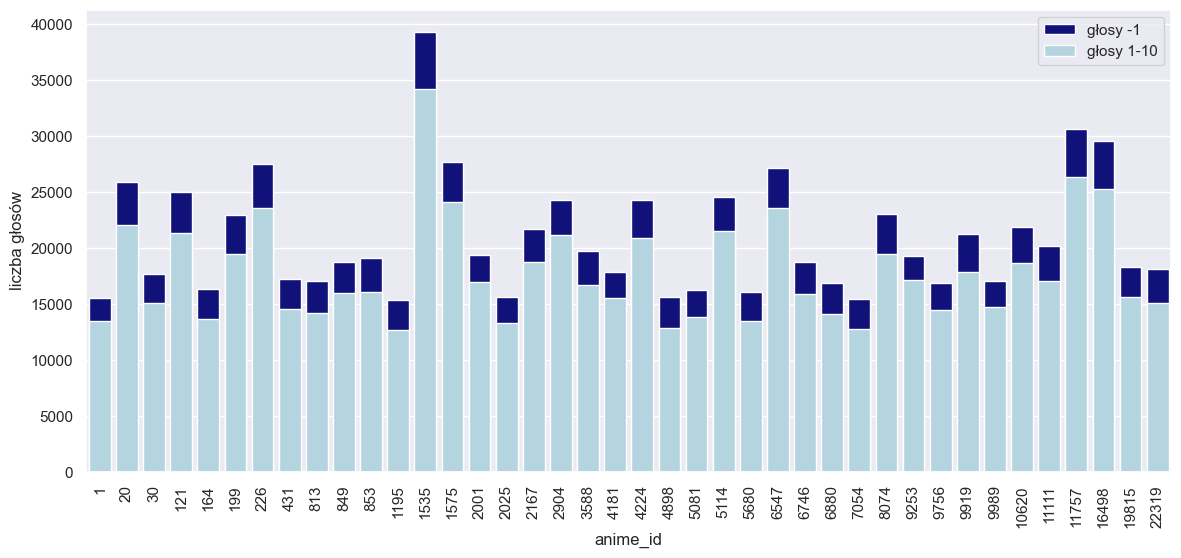

In [68]:
g1 = sns.barplot(graph1limited, x='anime_id', y='rating', color='darkblue', label='głosy -1')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
g1.set(xlabel='anime_id', ylabel='liczba głosów')
g1 = sns.barplot(graph1limited, x='anime_id', y='nonnegative', color='lightblue', label='głosy 1-10')
g1.legend()

In [81]:
statsPerAnime.head()

,counts
anime_id,
1535,34226
11757,26310
16498,25290
1575,24126
6547,23565


In [17]:
statsPerAnime['ratingSum'] = mostVotedAnime.groupby('anime_id').sum()

In [18]:
statsPerAnime['ratingMean'] = statsPerAnime['ratingSum']/statsPerAnime['counts']

In [19]:
statsPerAnime = statsPerAnime.sort_values(by='ratingMean', ascending=False)

In [46]:
statsPerAnime.head()

,counts,ratingSum,ratingMean
anime_id,,,
8196,1,10,10.0
33791,1,10,10.0
5606,1,10,10.0
33484,1,10,10.0
30743,1,10,10.0


In [25]:
statsPerAnime[statsPerAnime.index ==30743]

,counts,ratingSum,ratingMean
anime_id,,,
30743,1,10,10.0


In [20]:
statsPerAnimeAbove10000 = statsPerAnime[statsPerAnime['counts']>10000]

In [48]:
statsPerAnimeAbove10000.head()

,counts,ratingSum,ratingMean
anime_id,,,
5114,21494,200383,9.322741
9253,17151,158841,9.261326
4181,15518,142227,9.165292
2904,21124,191380,9.059837
30276,11323,101224,8.939680


In [49]:
graph3 = statsPerAnimeAbove10000

In [87]:
graph3.head()

,counts,ratingSum,ratingMean
anime_id,,,
5114,21494,200383,9.322741
9253,17151,158841,9.261326
4181,15518,142227,9.165292
2904,21124,191380,9.059837
30276,11323,101224,8.939680


In [50]:
graph3.reset_index(inplace=True)

In [90]:
graph3.head()

,anime_id,counts,ratingSum,ratingMean
0,5114,21494,200383,9.322741
1,9253,17151,158841,9.261326
2,4181,15518,142227,9.165292
3,2904,21124,191380,9.059837
4,30276,11323,101224,8.939680


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_1944\10306786.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(statsPerAnimeAbove10000['anime_id'], rotation=90)


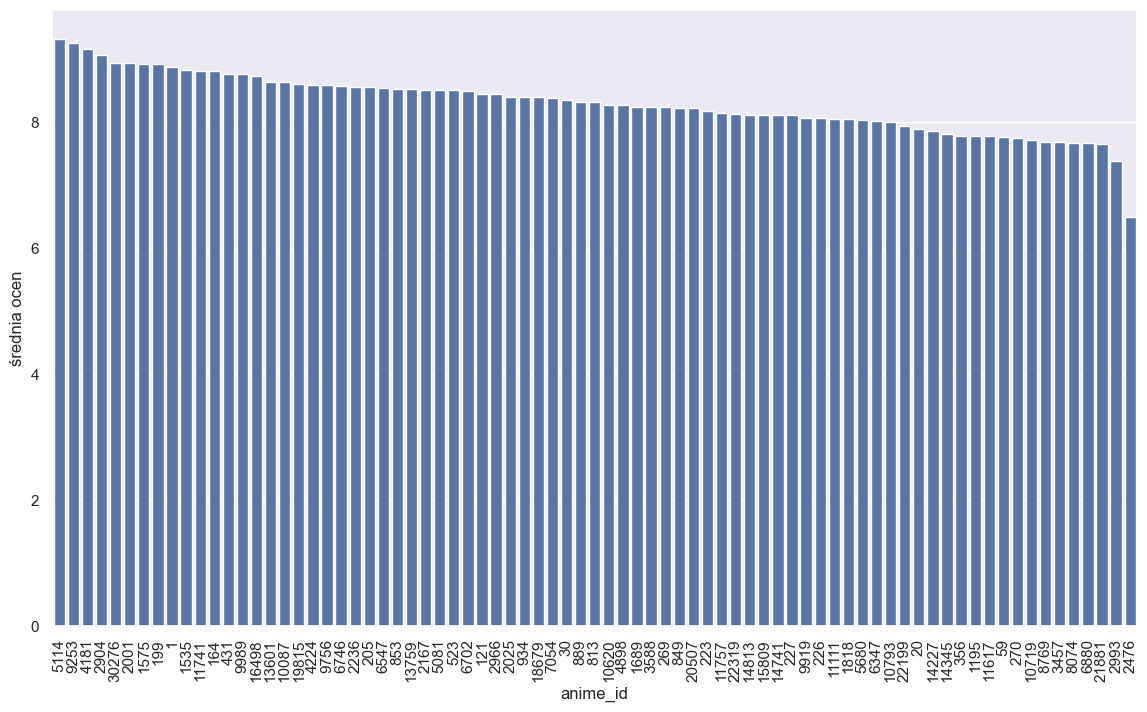

In [66]:
g3 = sns.barplot(data=statsPerAnimeAbove10000, x=statsPerAnimeAbove10000.index, y='ratingMean')
g3.set_xticklabels(statsPerAnimeAbove10000['anime_id'], rotation=90)
g3.set(xlabel='anime_id', ylabel='średnia ocen')
g3 = sns.set_theme(rc={'figure.figsize':(14,6)})

In [50]:
#graph2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 5114 to 2476
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   counts      77 non-null     int64  
 1   ratingSum   77 non-null     int64  
 2   ratingMean  77 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.4 KB


In [605]:
statsPerAnimeAbove10000.tail()

,counts,ratingSum,ratingMean,has0,has10
anime_id,,,,,
8074,19488,149443,7.668463,0,0.0
6880,14088,108002,7.666241,0,0.0
21881,11496,88030,7.657446,0,0.0
2993,11399,84140,7.381349,0,0.0
2476,10484,68003,6.486360,0,0.0


#number of votes

In [68]:
mostVotedAnime.groupby('rating').count()

,anime_id,has10,has1
rating,,,
1,16649,16649,16649
2,23150,23150,23150
3,41453,41453,41453
4,104291,104291,104291
5,282806,282806,282806
6,637775,637775,637775
7,1375287,1375287,1375287
8,1646019,1646019,1646019
9,1254094,1254094,1254094


[Text(0, 0, '16649'),
 Text(0, 0, '23150'),
 Text(0, 0, '41453'),
 Text(0, 0, '104291'),
 Text(0, 0, '282806'),
 Text(0, 0, '637775'),
 Text(0, 0, '1375287'),
 Text(0, 0, '1646019'),
 Text(0, 0, '1254094'),
 Text(0, 0, '955715')]

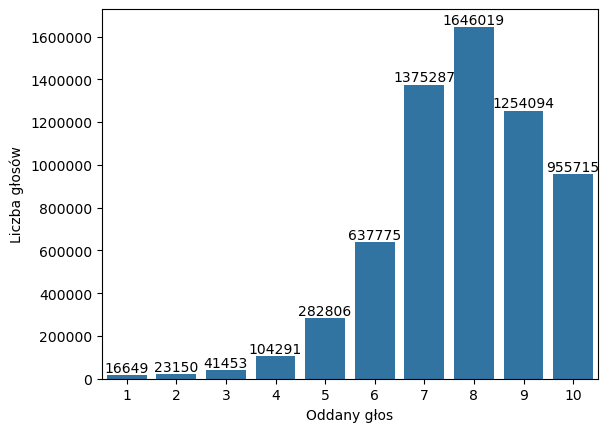

In [38]:
fig = sns.countplot(x='rating', data=mostVotedAnime)
fig.set(ylabel='Liczba głosów', xlabel='Oddany głos')
fig.bar_label(fig.containers[0], fmt='%.lf', fontsize=10)

In [98]:
mostVotedAnime['rating'].mean()

7.808496570825244

In [411]:
#has 0 or 10

In [41]:
mostVotedAnime.loc[mostVotedAnime['rating']==10, 'has10']=1

In [42]:
mostVotedAnime.loc[mostVotedAnime['rating']==1, 'has1']=1

In [43]:
mostVotedAnime.fillna(0, inplace=True)

In [44]:
mostVotedAnime.head(10)

,anime_id,rating,has10,has1
47,8074,10,1.0,0.0
81,11617,10,1.0,0.0
83,11757,10,1.0,0.0
101,15451,10,1.0,0.0
153,11771,10,1.0,0.0
156,20,8,0.0,0.0
157,154,6,0.0,0.0
158,170,9,0.0,0.0
159,199,10,1.0,0.0
160,225,9,0.0,0.0


In [45]:
mostVotedAnime[mostVotedAnime['rating']==1]

,anime_id,rating,has10,has1
308,24,1,0.0,1.0
309,30,1,0.0,1.0
313,63,1,0.0,1.0
328,189,1,0.0,1.0
329,190,1,0.0,1.0
...,...,...,...,...
7809510,8460,1,0.0,1.0
7809525,9515,1,0.0,1.0
7811985,601,1,0.0,1.0
7812204,79,1,0.0,1.0


In [46]:
mostVotedAnime.groupby('anime_id').sum().sort_values(by='has1', ascending=False)

,rating,has10,has1
anime_id,,,
413,2530,73.0,525.0
2476,68003,923.0,404.0
19315,9005,42.0,339.0
1639,9542,312.0,337.0
5391,5727,145.0,165.0
...,...,...,...
6310,61,1.0,0.0
6303,59,1.0,0.0
6299,889,10.0,0.0


In [47]:
graph4 = mostVotedAnime.groupby('anime_id').sum().sort_values(by='has1', ascending=False)

In [48]:
graph4.reset_index(inplace=True)

In [114]:
graph4.head()

,anime_id,level_0,index,rating,has10,has1
0,413,3138264344,3871711498,2530,73.0,525.0
1,2476,33259912334,41032913432,68003,923.0,404.0
2,19315,6193024121,7639930616,9005,42.0,339.0
3,1639,5652474555,6973152835,9542,312.0,337.0
4,5391,3287526156,4055223820,5727,145.0,165.0


In [49]:
graph4 = graph4[:20]

In [122]:
graph4.head(20)

,anime_id,level_0,index,rating,has10,has1
0,413,3138264344,3871711498,2530,73.0,525.0
1,2476,33259912334,41032913432,68003,923.0,404.0
2,19315,6193024121,7639930616,9005,42.0,339.0
3,1639,5652474555,6973152835,9542,312.0,337.0
4,5391,3287526156,4055223820,5727,145.0,165.0
5,4866,3044970904,3756085033,5278,157.0,162.0
6,3287,655457077,808596827,436,9.0,129.0
7,11757,80698781767,99546669528,214169,6702.0,123.0
8,16608,602259730,742815100,617,22.0,99.0
9,17513,7981765682,9846322233,16044,209.0,91.0


In [116]:
graph4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  100 non-null    int64  
 1   level_0   100 non-null    int64  
 2   index     100 non-null    int64  
 3   rating    100 non-null    int64  
 4   has10     100 non-null    float64
 5   has1      100 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_16740\3238044141.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g5.set_xticklabels(graph4['anime_id'], rotation=90)


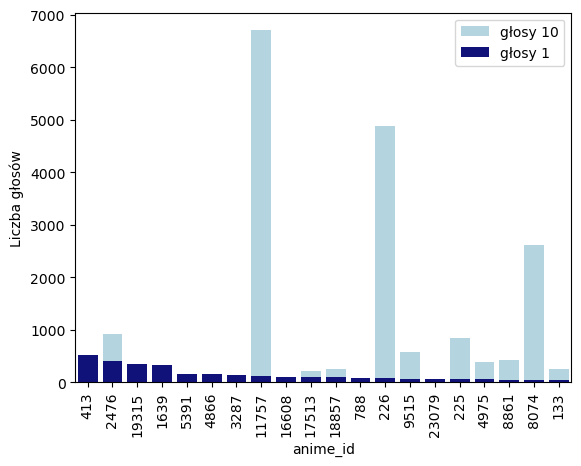

In [50]:
g4 = sns.barplot(graph4, x=graph4.index, y='has10', color='lightblue', label='głosy 10')
g5 = sns.barplot(graph4, x=graph4.index, y='has1', color='darkblue', label='głosy 1')
g5.set_xticklabels(graph4['anime_id'], rotation=90)
g5.set(xlabel='anime_id', ylabel='Liczba głosów')
g5.legend()

In [ ]:
#counting -1 votes

In [64]:
rating.groupby('rating').count()

,user_id,anime_id
rating,,
-1,1476488,1476488
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [65]:
notVoted = rating[rating['rating'] == -1]

In [66]:
notVoted = notVoted.drop('user_id', axis=1)

In [131]:
notVoted.head()

,anime_id,rating
0,20,-1
1,24,-1
2,79,-1
3,226,-1
4,241,-1


In [67]:
notVoted.groupby('anime_id').count()

,rating
anime_id,
1,2060
5,1137
6,1692
7,460
8,105
...,...
34367,1
34412,1
34475,1


In [54]:
graph6 = notVoted.groupby('anime_id').count().sort_values(by='rating', ascending=False)

In [55]:
graph6 = graph6[:40]

In [56]:
graph6.reset_index(inplace=True)

In [142]:
graph6.head()

,anime_id,rating
0,1535,5114
1,16498,4294
2,11757,4273
3,226,3978
4,20,3854


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_16740\1193583489.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g6.set_xticklabels(graph6['anime_id'], rotation=90)


[Text(0.5, 0, 'anime_id'), Text(0, 0.5, 'Liczba wartości -1')]

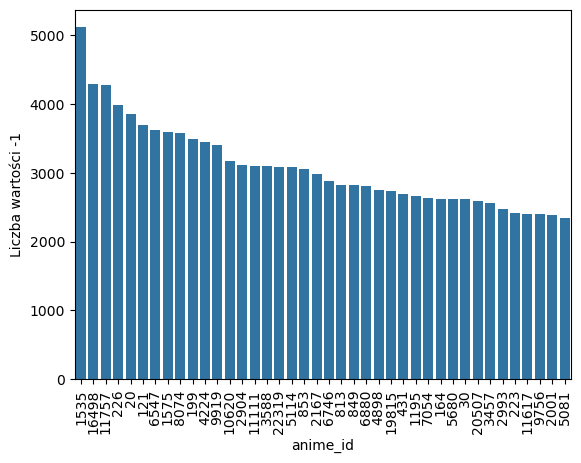

In [57]:
g6 = sns.barplot(graph6, x=graph6.index, y='rating')
g6.set_xticklabels(graph6['anime_id'], rotation=90)
g6.set(xlabel='anime_id', ylabel='Liczba wartości -1')

In [23]:
df[df['anime_id']==6]

,anime_id,name,genre,type,episodes,rating,members
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069


In [22]:
statsPerAnime[statsPerAnime.index == 3481]

,counts,ratingSum,ratingMean
anime_id,,,
3481,35,262,7.485714


In [294]:
#Genre analysis

In [151]:
genreList = df['genre'].tolist()

In [152]:
genreUniques = []
i=0
for line in genreList:
    i=i+1
    if type(line) != str:
        #print(type(line))
        #print(line)
        continue
    else:
        words = line.split(',')
        for word in words:
            wordNoSpaces = word.strip()
            if not wordNoSpaces in genreUniques:
                genreUniques.append(wordNoSpaces)

In [153]:
print(genreUniques)

['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports', 'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music', 'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror', 'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri']


In [154]:
genreEncoded = pd.DataFrame()

In [155]:
for i in genreUniques:
    genreEncoded[i]=0

In [156]:
genreEncoded['NaN']=0

In [157]:
genreEncoded.head()

,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,Military,Shounen,...,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri,NaN


In [158]:
print(genreList[0])

Drama, Romance, School, Supernatural


In [159]:
i=0
for line in genreList:
    
    if type(line) != str:
        genreEncoded.loc[i,'NaN']=1
        i=i+1
        continue
        
    else:
        words = line.split(',')
        for word in words:
            wordNoSpaces = word.strip()
            genreEncoded.loc[i, wordNoSpaces]=1
        i=i+1           

In [160]:
genreEncoded.fillna(0, inplace=True)

In [161]:
genreEncoded.head(10)

,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,Military,Shounen,...,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri,NaN
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
print(genreEncoded['NaN'].sum())

62.0


In [163]:
genreTitles = genreEncoded.columns
genreSum = []

In [164]:
print(genreSum)

[]


In [165]:
for i in genreTitles:
    genreSum.append(genreEncoded[i].sum())

In [166]:
print(genreSum)

[2016.0, 1464.0, 1220.0, 1037.0, 2845.0, 2348.0, 2309.0, 778.0, 426.0, 1711.0, 4645.0, 806.0, 408.0, 148.0, 2070.0, 87.0, 543.0, 465.0, 381.0, 1220.0, 944.0, 860.0, 495.0, 547.0, 265.0, 102.0, 603.0, 369.0, 197.0, 229.0, 294.0, 637.0, 54.0, 65.0, 181.0, 240.0, 317.0, 72.0, 1609.0, 55.0, 1141.0, 39.0, 42.0, 62.0]


In [168]:
genreSum.head()

AttributeError: 'list' object has no attribute 'head'

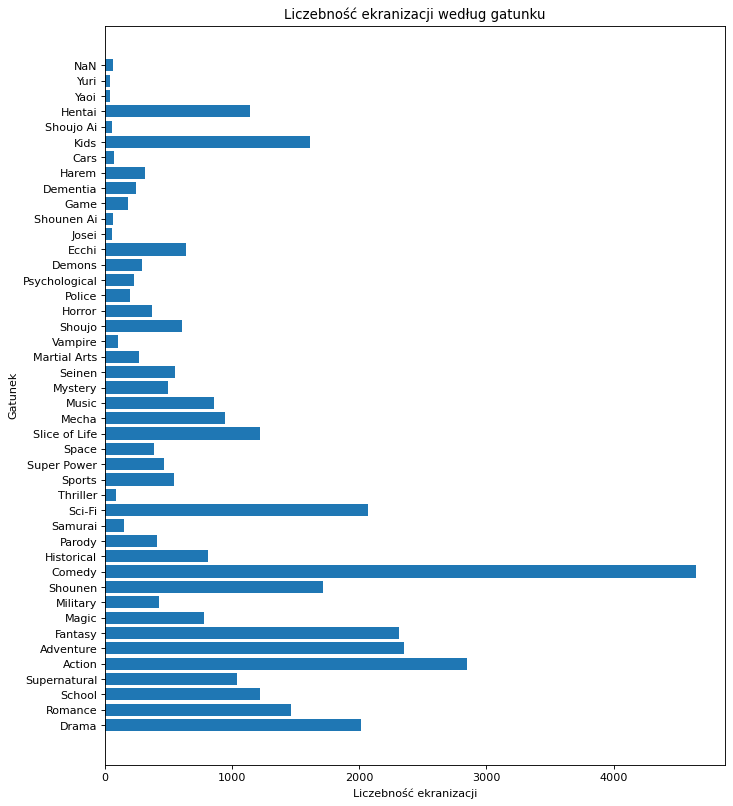

In [163]:
plt.figure(figsize=(10, 12), dpi=80)
plt.barh(genreTitles, genreSum)
plt.title('Liczebność ekranizacji według gatunku')
plt.xlabel('Liczebność ekranizacji')
plt.ylabel('Gatunek')
plt.show()

In [373]:
mostVotedAnime.head()

,anime_id,rating
47,8074,10
81,11617,10
83,11757,10
101,15451,10
153,11771,10


In [61]:
#users analysis

In [58]:
mostVotedAnime = rating[rating['rating']>-1]

In [59]:
mostVotedAnime.groupby('user_id').count().sort_values('anime_id', ascending=False)

,anime_id,rating
user_id,,
42635,3747,3747
53698,2905,2905
57620,2689,2689
59643,2632,2632
51693,2621,2621
...,...,...
66747,1,1
35463,1,1
55557,1,1


In [60]:
graph8 = mostVotedAnime.groupby('user_id').count().sort_values('anime_id', ascending=False)

In [61]:
graph8 = graph8[:40]

In [62]:
graph8.reset_index(inplace=True)

In [34]:
graph8.head(20)

,anime_id,rating
user_id,,
42635,3747,3747
53698,2905,2905
57620,2689,2689
59643,2632,2632
51693,2621,2621
45659,2462,2462
7345,2429,2429
12431,2348,2348
65840,2215,2215


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_16740\762663326.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g8.set_xticklabels(notVotedCountLimited['user_id'], rotation=90)


[Text(0, 0, '48766'),
 Text(1, 0, '66021'),
 Text(2, 0, '40604'),
 Text(3, 0, '10283'),
 Text(4, 0, '50264'),
 Text(5, 0, '58343'),
 Text(6, 0, '33285'),
 Text(7, 0, '5705'),
 Text(8, 0, '51216'),
 Text(9, 0, '27364'),
 Text(10, 0, '19898'),
 Text(11, 0, '38168'),
 Text(12, 0, '52371'),
 Text(13, 0, '69121'),
 Text(14, 0, '52447'),
 Text(15, 0, '8446'),
 Text(16, 0, '40821'),
 Text(17, 0, '16797'),
 Text(18, 0, '53406'),
 Text(19, 0, '51848'),
 Text(20, 0, '25528'),
 Text(21, 0, '38145'),
 Text(22, 0, '22557'),
 Text(23, 0, '342'),
 Text(24, 0, '40691'),
 Text(25, 0, '43482'),
 Text(26, 0, '57563'),
 Text(27, 0, '49559'),
 Text(28, 0, '41137'),
 Text(29, 0, '24744'),
 Text(30, 0, '39532'),
 Text(31, 0, '41822'),
 Text(32, 0, '61130'),
 Text(33, 0, '17333'),
 Text(34, 0, '24295'),
 Text(35, 0, '31185'),
 Text(36, 0, '51057'),
 Text(37, 0, '60985'),
 Text(38, 0, '65809'),
 Text(39, 0, '48417')]

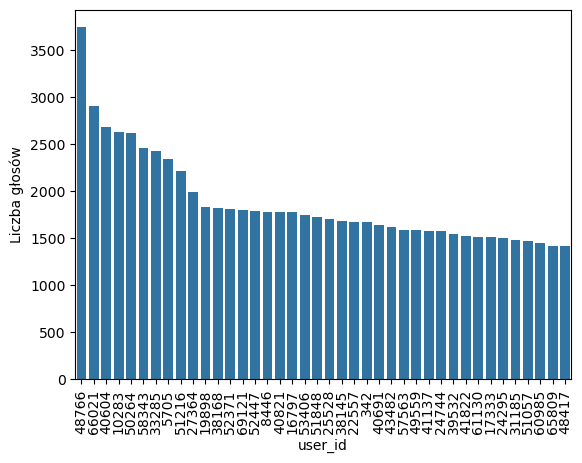

In [75]:
g8 = sns.barplot(x=graph8.index, y='rating', data=graph8)
g8.set(ylabel='Liczba głosów', xlabel='user_id')
g8.set_xticklabels(notVotedCountLimited['user_id'], rotation=90)

In [69]:
mostVotedAnime.groupby('user_id').count().median()

anime_id    45.0
rating      45.0
dtype: float64

In [70]:
notVoted = rating[rating['rating'] == -1]

In [71]:
notVotedCount = notVoted.groupby('user_id').count().sort_values('anime_id', ascending=False)

In [72]:
notVoted.groupby('user_id').count().median()

anime_id    6.0
rating      6.0
dtype: float64

In [186]:
notVotedCount.head()

,anime_id,rating
user_id,,
48766,10226,10226
66021,2315,2315
40604,1720,1720
10283,1629,1629
50264,1614,1614


In [73]:
notVotedCountLimited = notVotedCount[:40]

In [74]:
notVotedCountLimited.reset_index(inplace=True)

In [182]:
notVotedCountLimited.head()

,user_id,anime_id,rating
0,48766,10226,10226
1,66021,2315,2315
2,40604,1720,1720
3,10283,1629,1629
4,50264,1614,1614


C:\Users\Tomasz\AppData\Local\Temp\ipykernel_16740\1975275383.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g7.set_xticklabels(notVotedCountLimited['user_id'], rotation=90)


[Text(0, 0, '48766'),
 Text(1, 0, '66021'),
 Text(2, 0, '40604'),
 Text(3, 0, '10283'),
 Text(4, 0, '50264'),
 Text(5, 0, '58343'),
 Text(6, 0, '33285'),
 Text(7, 0, '5705'),
 Text(8, 0, '51216'),
 Text(9, 0, '27364'),
 Text(10, 0, '19898'),
 Text(11, 0, '38168'),
 Text(12, 0, '52371'),
 Text(13, 0, '69121'),
 Text(14, 0, '52447'),
 Text(15, 0, '8446'),
 Text(16, 0, '40821'),
 Text(17, 0, '16797'),
 Text(18, 0, '53406'),
 Text(19, 0, '51848'),
 Text(20, 0, '25528'),
 Text(21, 0, '38145'),
 Text(22, 0, '22557'),
 Text(23, 0, '342'),
 Text(24, 0, '40691'),
 Text(25, 0, '43482'),
 Text(26, 0, '57563'),
 Text(27, 0, '49559'),
 Text(28, 0, '41137'),
 Text(29, 0, '24744'),
 Text(30, 0, '39532'),
 Text(31, 0, '41822'),
 Text(32, 0, '61130'),
 Text(33, 0, '17333'),
 Text(34, 0, '24295'),
 Text(35, 0, '31185'),
 Text(36, 0, '51057'),
 Text(37, 0, '60985'),
 Text(38, 0, '65809'),
 Text(39, 0, '48417')]

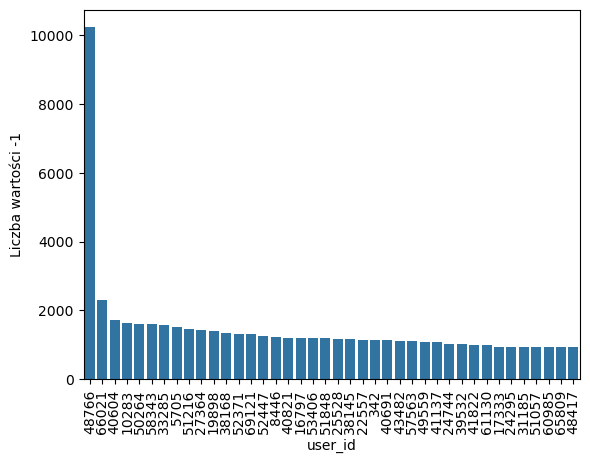

In [76]:
g7 = sns.barplot(x=notVotedCountLimited.index, y='rating', data=notVotedCountLimited)
g7.set(ylabel='Liczba wartości -1', xlabel='user_id')
g7.set_xticklabels(notVotedCountLimited['user_id'], rotation=90)

In [93]:
mostVotedAnime.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [95]:
mostVotedAnime.loc[mostVotedAnime['rating']==10, 'has10']=1

C:\Users\Tomasz\AppData\Local\Temp\ipykernel_2600\263270219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostVotedAnime.loc[mostVotedAnime['rating']==10, 'has10']=1


In [98]:
mostVotedAnime.loc[mostVotedAnime['rating']==1, 'has1']=1

C:\Users\Tomasz\AppData\Local\Temp\ipykernel_2600\3270399080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostVotedAnime.loc[mostVotedAnime['rating']==1, 'has1']=1


In [102]:
mostVotedAnime.fillna(0, inplace=True)

C:\Users\Tomasz\AppData\Local\Temp\ipykernel_2600\949433102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostVotedAnime.fillna(0, inplace=True)


In [104]:
mostVotedAnime.head()

,user_id,anime_id,rating,has10,has1
47,1,8074,10,1.0,0.0
81,1,11617,10,1.0,0.0
83,1,11757,10,1.0,0.0
101,1,15451,10,1.0,0.0
153,2,11771,10,1.0,0.0


In [114]:
usersStats = mostVotedAnime.groupby('user_id').sum()

In [116]:
usersStats.head(10)

,anime_id,rating,has10,has1
user_id,,,,
1,46899,40,4.0,0.0
2,11771,10,1.0,0.0
3,1194379,696,14.0,0.0
5,5021677,1999,2.0,78.0
7,5427742,2534,6.0,0.0
8,104390,100,2.0,0.0
9,1887,8,0.0,0.0
10,38752,28,1.0,0.0
11,571347,806,6.0,0.0


In [118]:
usersStats.drop('anime_id', axis=1, inplace=True)

In [122]:
usersStats['only10'] = False
usersStats['only1'] = False

In [134]:
usersStats[usersStats.index == 1]['rating']

user_id
1    40
Name: rating, dtype: int64

In [164]:
for i in usersStats.index:
    if usersStats.loc[i, 'rating']/10.0 == usersStats.loc[i, 'has10']:
        usersStats['only10'] = True
        usersStats['only1'] = False
#elif usersStats['rating']/1 == usersStats['has1']:
    #print('only1')
    #usersStats['only10'] = False
    #usersStats['only1'] = True

In [166]:
usersStats.head(60)

,rating,has10,has1,only10,only1
user_id,,,,,
1,40,4.0,0.0,True,False
2,10,1.0,0.0,True,False
3,696,14.0,0.0,True,False
5,1999,2.0,78.0,True,False
7,2534,6.0,0.0,True,False
8,100,2.0,0.0,True,False
9,8,0.0,0.0,True,False
10,28,1.0,0.0,True,False
11,806,6.0,0.0,True,False
